#**Problem Statement**

Homonyms are words that share the same spelling or form (characters) but possess distinct meanings. For instance, the term **"bank"** can assume two disparate contexts, denoting both a *"financial institution"* and the *"edge of a river."*

### Relevance in Sentiment Analysis
Homonyms hold significant relevance in sentiment analysis, given their capacity to alter the meaning or emotional tone of a sentence entirely. Consider the following examples that highlight this challenge:

#### Examples:
1. **Sentence 1**: "I hate the selfishness in you"  
   **Label**: *NEGATIVE*  

2. **Sentence 2**: "I hate anyone who hurts you"  
   **Label**: *POSITIVE*  

### Analysis of Contextual Impact
- In the first sentence, the word **"hate"** renders the sentiment as *NEGATIVE*.
- Conversely, in the second sentence, the same word, **"hate,"** appears but shapes the sentiment as *POSITIVE*.

### Challenges for Fixed Word Embeddings
This poses a considerable challenge to models relying on fixed word embeddings, as these embeddings treat words as having static meanings, neglecting contextual nuances.

### Solution: Contextualized Embeddings
To address this issue, employing **contextualized embeddings** leveraging **attention mechanisms** from **transformers** becomes crucial. Models like **BERT** and **GPT** are capable of grasping the comprehensive context within a sentence, allowing them to differentiate meanings based on surrounding words and sentence structures.

### Key Takeaway
Context-aware models enhance sentiment analysis by dynamically interpreting word meanings, thus overcoming the limitations of static embeddings when dealing with homonyms and ambiguous language structures.


for more see[wikipedia](https://https://en.wikipedia.org/wiki/Homonym)


#**Install required packages**

In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install seaborn --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 12.2 MB/s eta 0:00:00
   

#**Dataset investigation**

[The Stanford Sentiment Treebank](https://https://huggingface.co/datasets/stanfordnlp/sst2) is a corpus with fully labeled parse trees that allows for a complete analysis of the compositional effects of sentiment in language. The corpus is based on the dataset introduced by Pang and Lee (2005) and consists of 11,855 single sentences extracted from movie reviews. It was parsed with the Stanford parser and includes a total of 215,154 unique phrases from those parse trees, each annotated by 3 human judges.

Binary classification experiments on full sentences (negative or somewhat negative vs somewhat positive or positive with neutral sentences discarded) refer to the dataset as SST-2 or SST binary.

**why i choose to work with dataset instead of imdb_reviews?**


*   because the examples provided in this datasets is almost in the same length as the provided testing examples, imdb_reviews needs a lot of preprocessing steps required working with regex to ensure that the challanges are with my notebook note with the dataset i choose to work with SST2 dataset



In [33]:
#loading dataset from hugging face in the form of pandas for the easy manipulation
import pandas as pd

splits = {'train': 'data/train-00000-of-00001.parquet', 'validation': 'data/validation-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/stanfordnlp/sst2/" + splits["train"])

In [34]:
df.head()

,idx,sentence,label
0,0,hide new secretions from the parental units,0
1,1,"contains no wit , only labored gags",0
2,2,that loves its characters and communicates som...,1
3,3,remains utterly satisfied to remain the same t...,0
4,4,on the worst revenge-of-the-nerds clichés the ...,0


In [35]:
# Rename the Column from sentence to Sentence beacuse when i used GPT for data generation
# the output is with the S capital --> providing good concat without errors
df = df.rename(columns={"sentence":"Sentence"})

In [36]:
df.head()

,idx,Sentence,label
0,0,hide new secretions from the parental units,0
1,1,"contains no wit , only labored gags",0
2,2,that loves its characters and communicates som...,1
3,3,remains utterly satisfied to remain the same t...,0
4,4,on the worst revenge-of-the-nerds clichés the ...,0


#**adding more dataset examples same as the homonyms ones**

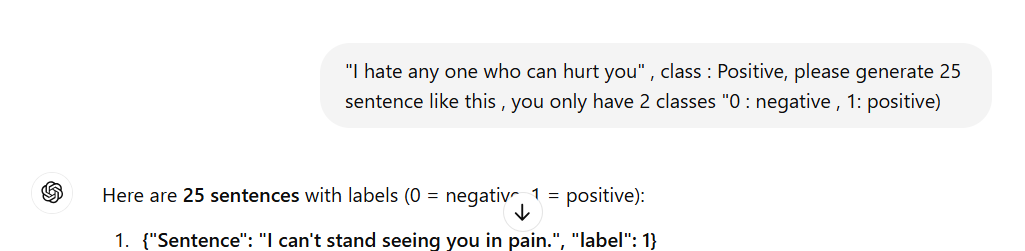

In [37]:
import pandas as pd

# Creating a list of dictionaries for the sentences and labels
data = [
    {"Sentence": "I can't stand seeing you in pain.", "label": 1},
    {"Sentence": "I detest anyone who makes you cry.", "label": 1},
    {"Sentence": "I will never forgive those who harm you.", "label": 1},
    {"Sentence": "I loathe the thought of you being hurt.", "label": 1},
    {"Sentence": "I despise anyone who disrespects you.", "label": 1},
    {"Sentence": "I feel sad when I see you upset.", "label": 1},
    {"Sentence": "I can't bear the idea of you being treated badly.", "label": 1},
    {"Sentence": "I reject negativity that brings you down.", "label": 1},
    {"Sentence": "I wish I could erase any pain you've felt.", "label": 1},
    {"Sentence": "I hate seeing you struggle without help.", "label": 1},
    {"Sentence": "I feel disgusted by those who mistreat you.", "label": 1},
    {"Sentence": "I find it unbearable to see you hurt.", "label": 1},
    {"Sentence": "I dislike anyone who makes you feel unworthy.", "label": 1},
    {"Sentence": "I can't tolerate anything that upsets you.", "label": 1},
    {"Sentence": "I reject actions that make you suffer.", "label": 1},
    {"Sentence": "I hate seeing you in distress.", "label": 1},
    {"Sentence": "I resent people who break your trust.", "label": 1},
    {"Sentence": "I abhor anything that takes away your happiness.", "label": 1},
    {"Sentence": "I will never accept anyone causing you pain.", "label": 1},
    {"Sentence": "I detest words that bring you down.", "label": 1},
    {"Sentence": "I hate the thought of losing you.", "label": 0},
    {"Sentence": "I can't stand feeling worthless.", "label": 0},
    {"Sentence": "I loathe the days when I feel alone.", "label": 0},
    {"Sentence": "I despise the way I doubt myself.", "label": 0},
    {"Sentence": "I feel broken when everything goes wrong.", "label": 0},
]

# Creating a pandas dataframe
df_2 = pd.DataFrame(data)

# Display the dataframe
df_2.head(25)


,Sentence,label
0,I can't stand seeing you in pain.,1
1,I detest anyone who makes you cry.,1
2,I will never forgive those who harm you.,1
3,I loathe the thought of you being hurt.,1
4,I despise anyone who disrespects you.,1
5,I feel sad when I see you upset.,1
6,I can't bear the idea of you being treated badly.,1
7,I reject negativity that brings you down.,1
8,I wish I could erase any pain you've felt.,1
9,I hate seeing you struggle without help.,1


**Here is added some more negative samples to balance the generated data**

In [38]:
# Additional negative examples
negative_data = [
    {"Sentence": "I can't bear the loneliness any longer.", "label": 0},
    {"Sentence": "I feel betrayed by the ones I trusted the most.", "label": 0},
    {"Sentence": "I hate the emptiness I feel inside.", "label": 0},
    {"Sentence": "I'm frustrated by everything going wrong in my life.", "label": 0},
    {"Sentence": "I can't stand the constant disappointment.", "label": 0},
    {"Sentence": "I feel hopeless when things never go as planned.", "label": 0},
    {"Sentence": "I resent all the mistakes I've made.", "label": 0},
    {"Sentence": "I feel miserable every time I remember that moment.", "label": 0},
    {"Sentence": "I can't trust anyone after what happened.", "label": 0},
    {"Sentence": "I loathe the fact that I failed again.", "label": 0},
    {"Sentence": "I feel like I'm constantly fighting an uphill battle.", "label": 0},
    {"Sentence": "I can't get rid of the feeling that I'm not good enough.", "label": 0},
    {"Sentence": "I hate that I always feel left out.", "label": 0},
    {"Sentence": "I despise the way my life has turned out.", "label": 0},
    {"Sentence": "I feel lost and don't know where I'm headed.", "label": 0},
    {"Sentence": "I can't shake off the feeling of regret.", "label": 0},
    {"Sentence": "I resent the way people treat me.", "label": 0},
    {"Sentence": "I feel isolated and disconnected from everyone.", "label": 0},
    {"Sentence": "I hate how I always mess things up.", "label": 0},
    {"Sentence": "I can't stand the thought of facing another failure.", "label": 0},
    {"Sentence": "I feel miserable when I think about how things ended.", "label": 0},
    {"Sentence": "I loathe the way my mind keeps reminding me of my mistakes.", "label": 0},
    {"Sentence": "I hate the dark thoughts that constantly cross my mind.", "label": 0},
    {"Sentence": "I feel like I'm losing control over everything.", "label": 0},
    {"Sentence": "I can't bear to see the pain I've caused.", "label": 0},
]

# Convert to dataframe
negative_df = pd.DataFrame(negative_data)

# Display the dataframe
negative_df.head()


,Sentence,label
0,I can't bear the loneliness any longer.,0
1,I feel betrayed by the ones I trusted the most.,0
2,I hate the emptiness I feel inside.,0
3,I'm frustrated by everything going wrong in my...,0
4,I can't stand the constant disappointment.,0


In [39]:
# Concatenate the two dataframes
df = pd.concat([df, df_2, negative_df], ignore_index=True)

# Display the concatenated dataframe
df.head()


,idx,Sentence,label
0,0.0,hide new secretions from the parental units,0
1,1.0,"contains no wit , only labored gags",0
2,2.0,that loves its characters and communicates som...,1
3,3.0,remains utterly satisfied to remain the same t...,0
4,4.0,on the worst revenge-of-the-nerds clichés the ...,0


In [40]:
df.tail()

,idx,Sentence,label
67394,NaN,I feel miserable when I think about how things...,0
67395,NaN,I loathe the way my mind keeps reminding me of...,0
67396,NaN,I hate the dark thoughts that constantly cross...,0
67397,NaN,I feel like I'm losing control over everything.,0
67398,NaN,I can't bear to see the pain I've caused.,0


#**Dataframe manipulations**

In [41]:
df['label_str'] = df['label'].map({0: 'negative', 1: 'positive'})

In [43]:
df.head(10)

,idx,Sentence,label,label_str
0,0.0,hide new secretions from the parental units,0,negative
1,1.0,"contains no wit , only labored gags",0,negative
2,2.0,that loves its characters and communicates som...,1,positive
3,3.0,remains utterly satisfied to remain the same t...,0,negative
4,4.0,on the worst revenge-of-the-nerds clichés the ...,0,negative
5,5.0,that 's far too tragic to merit such superfici...,0,negative
6,6.0,demonstrates that the director of such hollywo...,1,positive
7,7.0,of saucy,1,positive
8,8.0,a depressed fifteen-year-old 's suicidal poetry,0,negative
9,9.0,are more deeply thought through than in most `...,1,positive


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67399 entries, 0 to 67398
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idx        67349 non-null  float64
 1   Sentence   67399 non-null  object 
 2   label      67399 non-null  int64  
 3   label_str  67399 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.1+ MB


In [45]:
df['label_str'].value_counts()


,count
label_str,
positive,37589
negative,29810


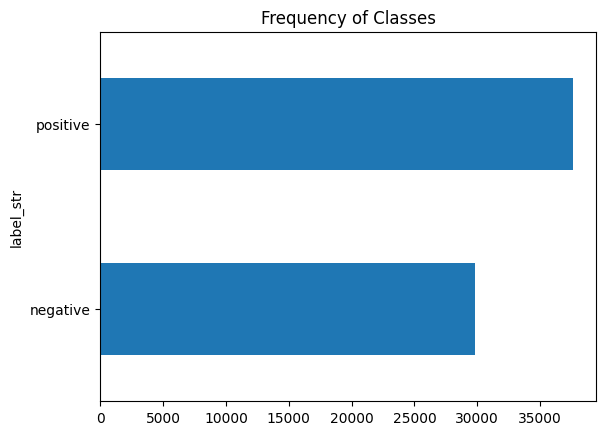

In [46]:
import matplotlib.pyplot as plt
label_counts = df['label_str'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

**Observing a slight class imbalance** --> around 55% POSITIVE to 45% NEGATIVE
NO NEED FOR BALANCING

<Axes: title={'center': 'Words_per_review'}, xlabel='label_str'>

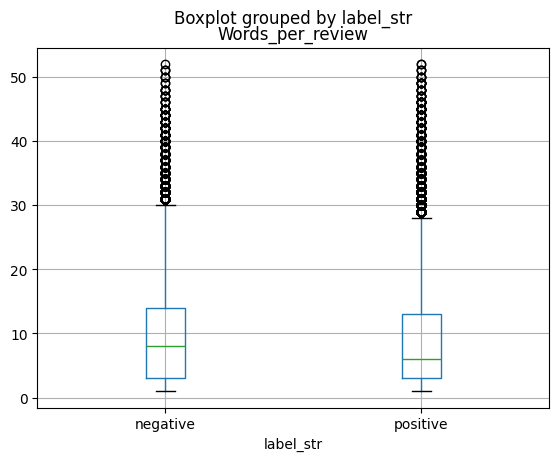

In [48]:
df['Words_per_review'] = df['Sentence'].str.split().apply(len)
df.boxplot("Words_per_review", by="label_str")

In [49]:
df.head()

,idx,Sentence,label,label_str,Words_per_review
0,0.0,hide new secretions from the parental units,0,negative,7
1,1.0,"contains no wit , only labored gags",0,negative,7
2,2.0,that loves its characters and communicates som...,1,positive,12
3,3.0,remains utterly satisfied to remain the same t...,0,negative,8
4,4.0,on the worst revenge-of-the-nerds clichés the ...,0,negative,10


**Dropping senetence's length more than 30** around 2000 : 60,000 examples
so i choose to drop

In [50]:
df[df["Words_per_review"] > 30].count()

,0
idx,1712
Sentence,1712
label,1712
label_str,1712
Words_per_review,1712


In [52]:
df = df[df["Words_per_review"] < 30]

<ipython-input-53-04126b2de5c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Words_per_review'] = df['Sentence'].str.split().apply(len)


<Axes: title={'center': 'Words_per_review'}, xlabel='label_str'>

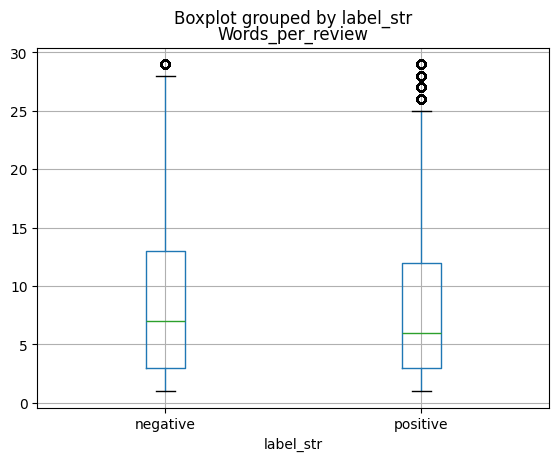

In [53]:
df['Words_per_review'] = df['Sentence'].str.split().apply(len)
df.boxplot("Words_per_review", by="label_str")

In [56]:
df[df["Sentence"].str.contains("I can't stand seeing you in pain.")]

,idx,Sentence,label,label_str,Words_per_review
67349,NaN,I can't stand seeing you in pain.,1,positive,7


In [57]:
df['label_str'].value_counts()


,count
label_str,
positive,36507
negative,28883


#**Text to Tokens Conversion**
- Transformer models like BERT cannot receive raw strings as input; instead, they assume the text has been tokenized and encoded as numerical vectors.
- Tokenization is the step of breaking down a string into the units used in the model

##**Test example**

**The decision of choosing DistilBERT over traditional BERT:**

*   DistilBERT offers a 40% reduction in memory requirements (67 million parameters) compared to the standard BERT base (110 million parameters)

*   After doing Research for the homonyms , i found that there is a finetuned version of distilBERT who works well on this examples [See the model](https://https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english)

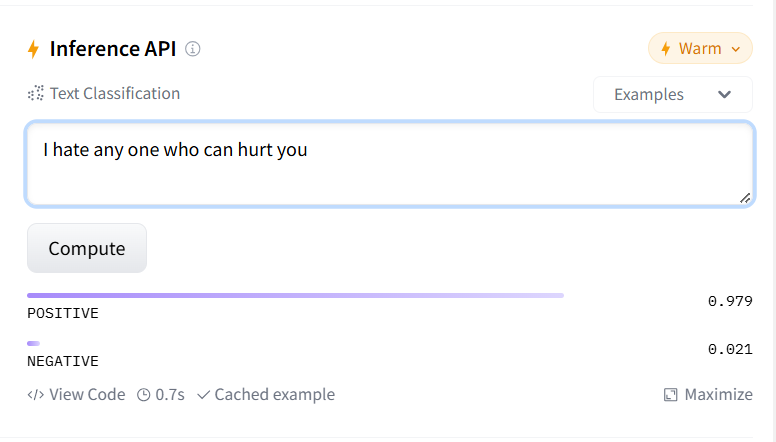

In [58]:
from transformers import AutoTokenizer

model_ckpt = "distilbert/distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)


text = "I love machine learning! Tokenization is awesome!!"
encoded_text = tokenizer(text)
print(encoded_text)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': [101, 1045, 2293, 3698, 4083, 999, 19204, 3989, 2003, 12476, 999, 999, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [59]:
len(tokenizer.vocab), tokenizer.vocab_size, tokenizer.model_max_length


(30522, 30522, 512)

#**Data loader and train_test_split**

In [64]:
# dropping idx column
df= df.drop(columns=["idx"])

In [65]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.1, stratify=df['label_str'], random_state=42)
test, validation = train_test_split(test, test_size=1/3, stratify=test['label_str'], random_state=42)

train.shape, test.shape, validation.shape

((58851, 4), (4359, 4), (2180, 4))

In [66]:
#converting pandas to HF Dataset
from datasets import Dataset, DatasetDict

dataset = DatasetDict(
    {'train':Dataset.from_pandas(train, preserve_index=False),
     'test':Dataset.from_pandas(test, preserve_index=False),
     'validation': Dataset.from_pandas(validation, preserve_index=False)
     }

)

dataset

DatasetDict({
    train: Dataset({
        features: ['Sentence', 'label', 'label_str', 'Words_per_review'],
        num_rows: 58851
    })
    test: Dataset({
        features: ['Sentence', 'label', 'label_str', 'Words_per_review'],
        num_rows: 4359
    })
    validation: Dataset({
        features: ['Sentence', 'label', 'label_str', 'Words_per_review'],
        num_rows: 2180
    })
})

In [67]:
dataset['train'][0], dataset['train'][1]


({'Sentence': 'more smarts ',
  'label': 1,
  'label_str': 'positive',
  'Words_per_review': 2},
 {'Sentence': 'of why the dv revolution has cheapened the artistry of making a film ',
  'label': 0,
  'label_str': 'negative',
  'Words_per_review': 13})

In [71]:
def tokenize(batch):
    temp = tokenizer(batch['Sentence'], padding="max_length", truncation=True, max_length=128)
    return temp

print(tokenize(dataset['train'][0]))

{'input_ids': [101, 2062, 6047, 2015, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}




 **1. Input IDs**
- **Definition**: Input IDs are numerical representations of tokens (words or subwords) in the input text.
- **Purpose**: They are passed into the model to identify which tokens are part of the input.
- **How It Works**:
  - Each token in the input is converted to an ID based on the tokenizer's vocabulary.
  - Special tokens such as `[CLS]` (classification) and `[SEP]` (separator) are added to the sequence.
- **Example**:
  Text: *"Hello, world!"*
  Tokenized: `["[CLS]", "hello", ",", "world", "!", "[SEP]"]`
  Input IDs: `[101, 7592, 1010, 2088, 999, 102]`

  Here, `101` and `102` are special token IDs for `[CLS]` and `[SEP]` respectively.

---

 **2. Attention Masks**
- **Definition**: Attention masks indicate which tokens in the input sequence should be attended to by the model.
- **Purpose**: They help the model differentiate between real tokens and padding tokens.
- **How It Works**:
  - Tokens that should be attended to (actual words) are marked as `1`.
  - Padding tokens (used to make all input sequences the same length) are marked as `0`.
- **Example**:
  Input IDs: `[101, 7592, 1010, 2088, 999, 102, 0, 0]`
  Attention Mask: `[1, 1, 1, 1, 1, 1, 0, 0]`

  Here, the zeros in the attention mask ensure the model ignores padding tokens.

---


| Feature              | Purpose                                                                                         | Example                                                                                                  |
|----------------------|-------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------|
| **Input IDs**         | Encodes text tokens as numerical IDs.                                                           | `[101, 7592, 1010, 2088, 999, 102]`                                                                      |
| **Attention Masks**   | Marks real tokens (`1`) and padding tokens (`0`).                                               | `[1, 1, 1, 1, 1, 1, 0, 0]`                                                                              |
| **TokenType IDs**     | Distinguishes segments (e.g., Sentence A: `0`, Sentence B: `1`).                                | `[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]`                                                                      |

---



In [72]:
imdb_encoded = dataset.map(tokenize, batched=True, batch_size=None)


Map:   0%|          | 0/58851 [00:00<?, ? examples/s]

Map:   0%|          | 0/4359 [00:00<?, ? examples/s]

Map:   0%|          | 0/2180 [00:00<?, ? examples/s]

In [73]:
imdb_encoded

DatasetDict({
    train: Dataset({
        features: ['Sentence', 'label', 'label_str', 'Words_per_review', 'input_ids', 'attention_mask'],
        num_rows: 58851
    })
    test: Dataset({
        features: ['Sentence', 'label', 'label_str', 'Words_per_review', 'input_ids', 'attention_mask'],
        num_rows: 4359
    })
    validation: Dataset({
        features: ['Sentence', 'label', 'label_str', 'Words_per_review', 'input_ids', 'attention_mask'],
        num_rows: 2180
    })
})

In [74]:
imdb_encoded['train'][0]

{'Sentence': 'more smarts ',
 'label': 1,
 'label_str': 'positive',
 'Words_per_review': 2,
 'input_ids': [101,
  2062,
  6047,
  2015,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

In [75]:
label2id = {x['label_str']:x['label'] for x in dataset['train']}
id2label = {v:k for k,v in label2id.items()}

label2id, id2label

({'positive': 1, 'negative': 0}, {1: 'positive', 0: 'negative'})

#**Model Building**

Here to see the Model before adding the Classification head

In [76]:
from transformers import AutoModel
import torch

In [77]:
model = AutoModel.from_pretrained(model_ckpt)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [78]:
model.config.id2label


{0: 'LABEL_0', 1: 'LABEL_1'}

In [79]:
model.config

DistilBertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "distilbert/distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.47.1",
  "vocab_size": 30522
}

#**Model Finetuning**
adding Classification Head and id2label, label2id to the model config

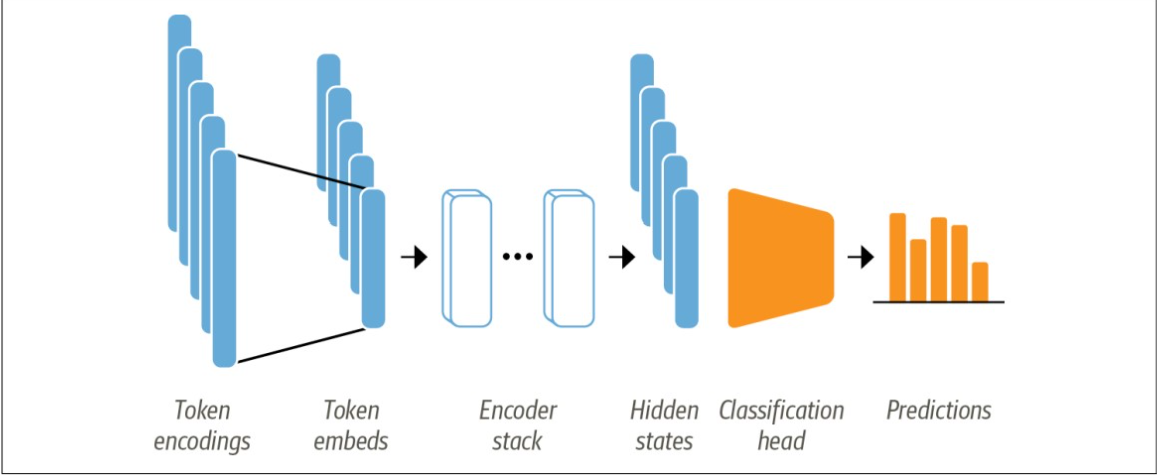

- The first thing we need is a pretrained BERT model like the one we used in the feature-based approach.
- The only slight modification is that we use the `AutoModelForSequenceClassification` model instead of AutoModel.
- The difference is that the `AutoModelForSequenceClassification` model has a classification head on top of the pretrained model outputs, which can be easily trained with the base model.

In [82]:
from transformers import AutoModelForSequenceClassification, AutoConfig

num_labels = len(label2id)
# for the GPU usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# adding the model config , classification head
# classifier --> is the linear layer(output = numOfClasses)
config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [83]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


we observe the added classification head is for the sentiment classification

In [84]:
model.config


DistilBertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "distilbert/distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "negative",
    "1": "positive"
  },
  "initializer_range": 0.02,
  "label2id": {
    "negative": 0,
    "positive": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.47.1",
  "vocab_size": 30522
}

#**Trainer**

##**Training Args**
i found model card for finetuning DistilBERT on the same datasets , suggests this training arguments so i choose to :

*   increase the number of epoches from 2 to 3
*   warmup_steps = 60
*   batch_size = 32 instead of 64
*   learning_rate= 1e-5 instead of 2e-5

i found the finetuned model when using **Transformer Pipeline** for the (sentiment-analysis) task without providing any model to see which is the model provided by HF itself

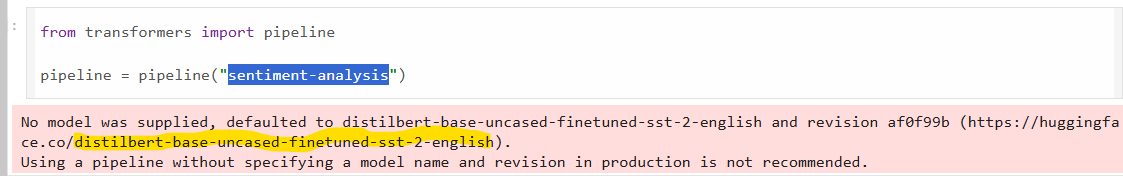



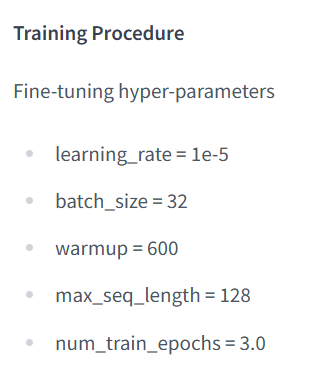

In [85]:
from transformers import TrainingArguments

batch_size = 32
training_dir = "Distelbert_base_train_dir"

training_args = TrainingArguments( output_dir=training_dir,
                                  overwrite_output_dir = True,
                                  num_train_epochs = 3,
                                   warmup_steps = 600,
                                  learning_rate = 1e-5,
                                  per_device_train_batch_size = batch_size,
                                  per_device_eval_batch_size = batch_size,
                                  weight_decay = 0.01,
                                  evaluation_strategy = 'epoch',
                                  disable_tqdm = False,
                                  report_to="none"
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


##**Eval Metrics**

In [87]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)

    return {"accuracy": acc, "f1": f1}

In [88]:
from transformers import Trainer

trainer = Trainer(model=model,
                  args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset = imdb_encoded['train'],
                  eval_dataset = imdb_encoded['validation'],
                  tokenizer = tokenizer)

<ipython-input-88-23922c5a90b5>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [89]:
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.223900,0.173022,0.936239,0.936262
2,0.146800,0.141964,0.952294,0.952328
3,0.115600,0.147620,0.952752,0.952784


TrainOutput(global_step=5520, training_loss=0.1901683812987977, metrics={'train_runtime': 2093.832, 'train_samples_per_second': 84.321, 'train_steps_per_second': 2.636, 'total_flos': 5846879158728192.0, 'train_loss': 0.1901683812987977, 'epoch': 3.0})

#**Model Evaluation**

In [90]:
preds_output = trainer.predict(imdb_encoded['test'])
preds_output.metrics

{'test_loss': 0.19165857136249542,
 'test_accuracy': 0.9415003441156229,
 'test_f1': 0.9415204565387805,
 'test_runtime': 15.1234,
 'test_samples_per_second': 288.229,
 'test_steps_per_second': 9.059}

In [91]:
import numpy as np
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = imdb_encoded['test'][:]['label']

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1925
           1       0.95      0.94      0.95      2434

    accuracy                           0.94      4359
   macro avg       0.94      0.94      0.94      4359
weighted avg       0.94      0.94      0.94      4359



##**Confusion matrix**

In [93]:
# plot confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

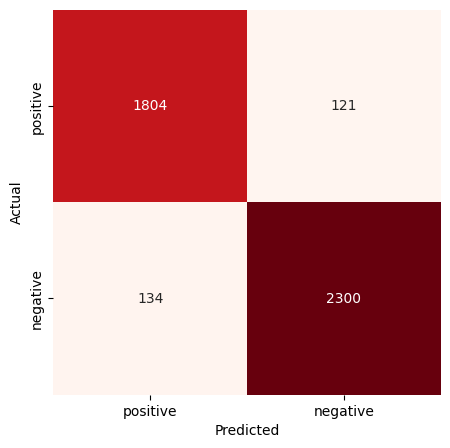

In [94]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, xticklabels=label2id.keys(), yticklabels=label2id.keys(), fmt='d', cbar=False, cmap='Reds')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

#**Prediction for some test examples**

In [95]:
text = "I hate the selfishness in you"

def get_prediction(text):
    input_encoded = tokenizer(text, padding="max_length", truncation=True, max_length=128, return_tensors='pt').to(device)

    with torch.no_grad():
        outputs = model(**input_encoded)

    logits = outputs.logits

    pred = torch.argmax(logits, dim=-1).item()
    return id2label[pred]

get_prediction(text)

'negative'

In [96]:
get_prediction("I hate any one who can hurt you")

'positive'

In [98]:
get_prediction("I hate any one who hurts you")

'positive'

In [99]:
get_prediction("I love any one who is hurting me ")

'positive'

#**Model Save to the drive**

In [ ]:
trainer.save_model("Distelbert-base-uncased-sentiment-model-homonyms")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
trainer.save_model("/content/drive/MyDrive/NLP-models")

#**Using HF pipeline with Our FT model**

In [ ]:
from transformers import pipeline

classifier = pipeline('sentiment-analysis', model= 'Distelbert-base-uncased-sentiment-model-homonyms')

classifier(['hello, how are you?', "love you", "i am feeling low"])

Device set to use cuda:0


[{'label': 'positive', 'score': 0.9788574576377869},
 {'label': 'positive', 'score': 0.997329592704773},
 {'label': 'negative', 'score': 0.9956319332122803}]

#**References**

<h2>References for Fine-tuning DistilBERT and BERT:</h2>
<ul>
    <li><a href="https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english" target="_blank">
        DistilBERT SST-2 Fine-tuned Model</a> - Pre-trained DistilBERT fine-tuned for sentiment analysis.</li>
    <li><a href="https://huggingface.co/transformers/v4.21.1/training.html" target="_blank">
        Hugging Face Transformers - Fine-tuning Models</a> - Official documentation for training and fine-tuning transformers.</li>
    <li><a href="https://huggingface.co/docs/transformers/training" target="_blank">
        Hugging Face Training Guide</a> - Step-by-step training and fine-tuning examples.</li>
    <li><a href="https://huggingface.co/models?filter=bert" target="_blank">
        Pre-trained BERT Models</a> - List of BERT models available for fine-tuning.</li>
    <li><a href="https://colab.research.google.com/github/huggingface/notebooks/blob/main/examples/text_classification.ipynb" target="_blank">
        Hugging Face Text Classification Example</a> - Colab example for text classification using BERT.</li>
</ul>
"""